In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

UsageError: Line magic function `%` not found.


In [2]:

df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [7]:
control_mean = df.groupby(['id', 'group']).mean().reset_index()

In [11]:
control_mean.query("group == 'control'")

,id,group,total_days,completed
0,182951,control,52.0,0.0
3,183035,control,56.0,0.0
4,183148,control,74.0,1.0
5,183517,control,53.0,0.0
9,183857,control,53.0,0.0
...,...,...,...,...
3810,934024,control,65.0,0.0
3811,934041,control,115.0,1.0
3812,934166,control,45.0,0.0
3825,936442,control,49.0,0.0


In [16]:
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
control_mean = df.query("group == 'control'")['total_days'].mean()

# get the average classroom time for experiment group
experiment_mean = df.query("group == 'experiment'")['total_days'].mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [17]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [22]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace = True)
    control_mean = b_samp.query("group == 'control'")['total_days'].mean()
    experiment_mean = b_samp.query("group == 'experiment'")['total_days'].mean()
    diffs.append(experiment_mean-control_mean)

In [23]:
# convert to numpy array
diffs = np.array(diffs)

(array([  22.,  117.,  589., 1638., 2818., 2653., 1543.,  518.,   93.,
           9.]),
 array([-1.37842501, -0.83423892, -0.29005283,  0.25413326,  0.79831934,
         1.34250543,  1.88669152,  2.43087761,  2.9750637 ,  3.51924978,
         4.06343587]),
 <BarContainer object of 10 artists>)

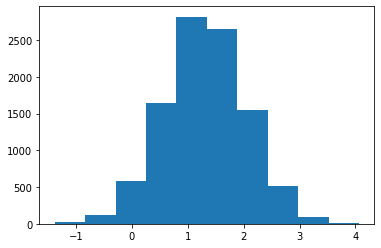

In [24]:
# plot sampling distribution
plt.hist(diffs)

In [25]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0,diffs.std(),diffs.size)

(array([  10.,   96.,  477., 1449., 2505., 2756., 1823.,  702.,  151.,
          31.]),
 array([-2.74201422, -2.21053145, -1.67904867, -1.14756589, -0.61608311,
        -0.08460034,  0.44688244,  0.97836522,  1.50984799,  2.04133077,
         2.57281355]),
 <BarContainer object of 10 artists>)

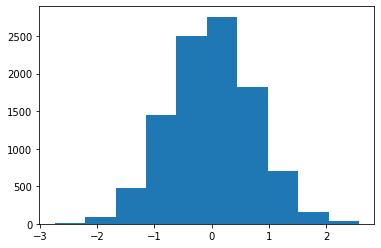

In [28]:
# plot null distribution
plt.hist(null_vals)

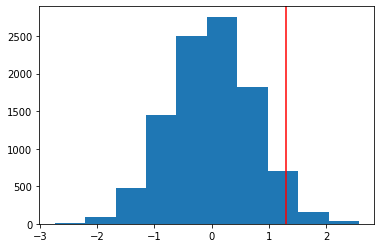

In [29]:
# plot line for observed statistic
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red');

In [30]:
# compute p value
(null_vals > obs_diff).mean()

0.0363